In [27]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [28]:
n = 3          # index of square grating
a = 1.2            # period 
d = 0.5*a            # side of square
t = 0.2          # thickness of grating
dpml = 2         # PML thickness
pad = 2          # padding between grating and PML

pol = mp.Ex

In [29]:
from meep.materials import Ag

block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=Ag)

In [30]:
fcen = 1
df = 0.8
nfreqs = 300

src = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a))

In [31]:
cell = mp.Vector3(a, 2*(t/2+pad+dpml))

sim = mp.Simulation(cell_size=cell,
                    default_material=mp.Medium(index=1),
                    geometry=[block],
                    sources=[src],
                    resolution=50,
                    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a,0)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a,0)))

     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

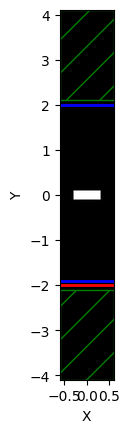

In [32]:
sim.plot2D()

In [33]:
pt = mp.Vector3(y=t/2+pad-0.1) # Point to check field
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, pt, 1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 9.70364e-05 s
Working in 2D dimensions.
Computational cell is 1.2 x 8.2 x 0 with resolution 50
     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0306242 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
on time step 5787 (time=57.87), 0.00069125 s/step
field decay(t = 100.01): 0.039996455618020614 / 0.039996455618020614 = 1.0
on time step 11612 (time=116.12), 0.000686742 s/step
on time step 17467 (time=174.67), 0.000683217 s/step
field decay(t = 200.02): 5.083013917207997e-0

     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

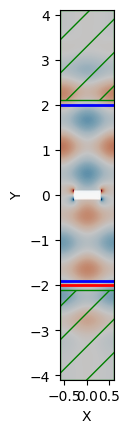

In [35]:
sim.plot2D(fields=mp.Ex)